Reading D:\FY2025\Fukuyama\work place\preprocessed_data\sub-010002_EC.fdt
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped


C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_15784\1583024316.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_15784\1583024316.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')


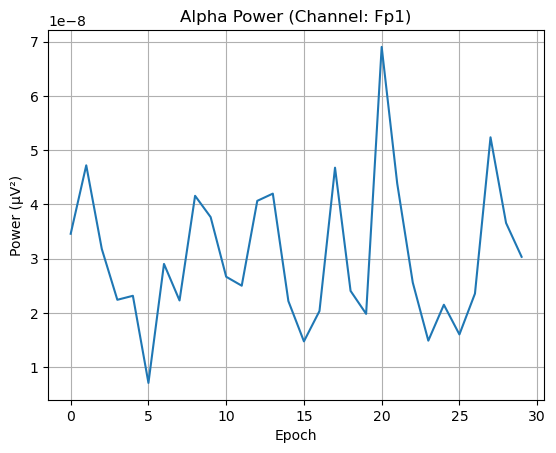

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# 1. Raw EEGデータの読み込み（例：MNEのサンプル）
raw = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
raw.crop(tmax=60)
raw.pick_types(eeg=True)

# 2. 疑似イベントでエポック化（2秒ごと）
events = mne.make_fixed_length_events(raw, id=1, duration=2.0)
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=2.0,
                    baseline=None, preload=True)

# 3. FFTでパワースペクトルを求める（NumPy）
sfreq = raw.info['sfreq']
data = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
n_fft = data.shape[-1]
freqs = np.fft.rfftfreq(n_fft, d=1/sfreq)
fft_data = np.fft.rfft(data, axis=2)  # shape: (n_epochs, n_channels, n_freqs)
power = np.abs(fft_data) ** 2         # パワースペクトル

# 4. 周波数帯定義
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta':  (13, 30),
    'gamma': (30, 50),
}

# 5. 周波数帯ごとのパワーを集計（平均）
band_powers = {band: [] for band in bands}
for band, (fmin, fmax) in bands.items():
    freq_mask = (freqs >= fmin) & (freqs < fmax)
    band_power = power[:, :, freq_mask].mean(axis=2)  # (n_epochs, n_channels)
    band_powers[band] = band_power

# 6. 例：α帯の1チャネル目の平均パワーを可視化
alpha_power = band_powers['alpha']  # shape: (n_epochs, n_channels)
ch_i = 0

plt.plot(alpha_power[:, ch_i])
plt.title(f"Alpha Power (Channel: {raw.ch_names[ch_i]})")
plt.xlabel("Epoch")
plt.ylabel("Power (μV²)")
plt.grid(True)
plt.show()